# Step 1: Import All Libraries

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# Step 2: Read the training dataset into the program


In [255]:
df=pd.read_csv('clean_data-1.csv')
df.head()

,id,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [256]:
print(df.size)

48096


# Step 3: Data Processing

In [257]:
print(df.isnull().sum())
print(df.shape)

id                          0
screen_name                 0
location                  963
description               387
url                      1269
followers_count             0
friends_count               0
listed_count                0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    279
default_profile             0
default_profile_image       0
name                        0
bot                         0
dtype: int64
(2672, 18)


In [258]:
percentage_null = df.isnull().sum() / len(df)
features_missing = percentage_null[percentage_null > 0.35].index
df.drop(features_missing, axis=1, inplace=True)
df

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,2.362091e+08,leslieberland,"Twitter CMO. Favorite title: Mama. Never, ever...",18998,2005,425,1/10/2011 2:06,2503,False,3498,en,RT @StationCDRKelly: Dreaming of napping in sp...,False,False,Leslie Berland,0
2668,2.545039e+08,SamuelsPants,"I live in brooklyn, I'm a bike messenger, I pl...",32,54,0,Sat Feb 19 12:12:42 +0000 2011,1,False,97,en,"{'geo': None, 'in_reply_to_status_id': None, '...",True,False,Samuel Littlefield,0
2669,1.548544e+07,jimmyfallon,astrophysicist,45044433,7451,68157,7/18/2008 19:46,24,True,9606,en,"Status(contributors=None, truncated=False, tex...",False,False,jimmy fallon,0
2670,7.513869e+08,LocalAlligator,"I'm quite out of my mind, actually, but people...",16,64,1,8/11/2012 14:53,15,False,62,en,{'created_at': 'Sun Feb 26 15:51:57 +0000 2017...,False,False,Tammas Foxdene,0


# Step 4: Visualization

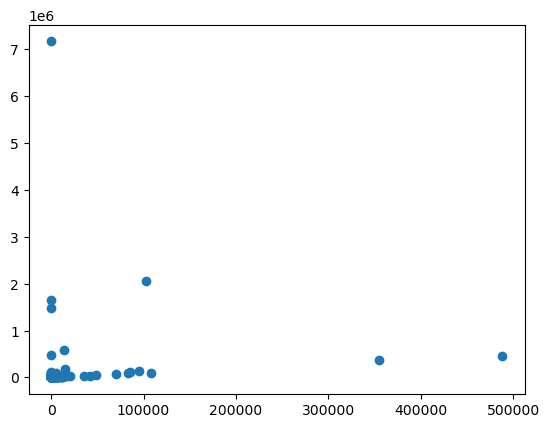

In [259]:
#scatter plot to visualize friends_count vs. followers_counts for bots
bot = df['bot'] == 1
df_bot = df[bot]
x = np.array(df_bot.friends_count)
y = np.array(df_bot.followers_count)
plt.scatter(x, y)
plt.show()

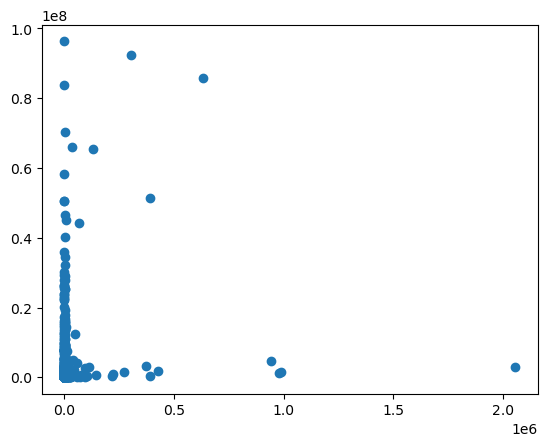

In [260]:
#scatter plot to visualize friends_count vs. followers_counts for non-bots
not_bot = df['bot'] == 0
df_not_bot = df[not_bot]
x = np.array(df_not_bot.friends_count)
y = np.array(df_not_bot.followers_count)
plt.scatter(x, y)
plt.show()

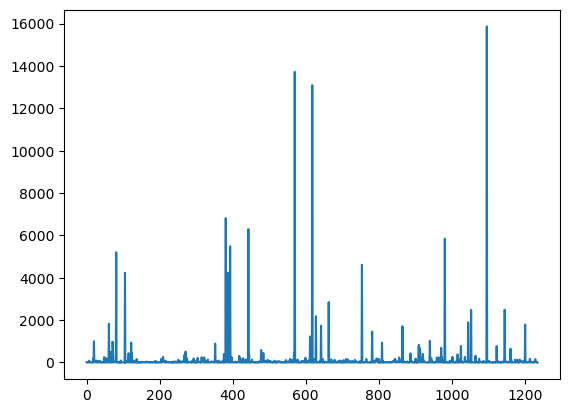

In [261]:
#visualizing the listed_count for bots
bot = df['bot'] == 1
df_bot = df[bot]
x = np.array(df_bot.listed_count)
plt.plot(x)
plt.show()

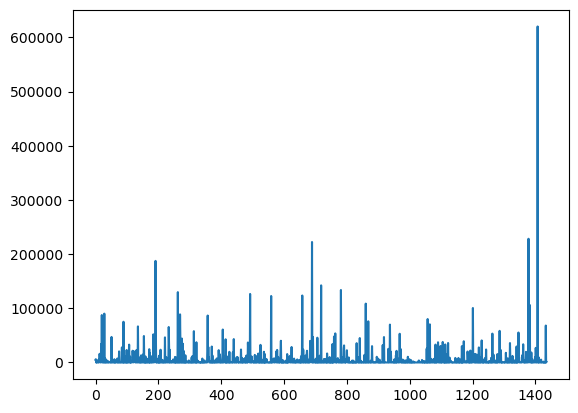

In [262]:
#visualizing the listed_count for non-bots
not_bot = df['bot'] == 0
df_not_bot = df[not_bot]
x = np.array(df_not_bot.listed_count)
plt.plot(x)
plt.show()

# Step 5: Feature Engineering

In [263]:
df.insert(len(df.columns), "screen_name_binary", 0, allow_duplicates=True)
df.insert(len(df.columns), "name_binary", 0, allow_duplicates=True)
df.insert(len(df.columns), "description_binary", 0, allow_duplicates=True)
df.insert(len(df.columns), "status_binary", 0, allow_duplicates=True)

df

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot,screen_name_binary,name_binary,description_binary,status_binary
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1,0,0,0,0
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1,0,0,0,0
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1,0,0,0,0
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1,0,0,0,0
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,2.362091e+08,leslieberland,"Twitter CMO. Favorite title: Mama. Never, ever...",18998,2005,425,1/10/2011 2:06,2503,False,3498,en,RT @StationCDRKelly: Dreaming of napping in sp...,False,False,Leslie Berland,0,0,0,0,0
2668,2.545039e+08,SamuelsPants,"I live in brooklyn, I'm a bike messenger, I pl...",32,54,0,Sat Feb 19 12:12:42 +0000 2011,1,False,97,en,"{'geo': None, 'in_reply_to_status_id': None, '...",True,False,Samuel Littlefield,0,0,0,0,0
2669,1.548544e+07,jimmyfallon,astrophysicist,45044433,7451,68157,7/18/2008 19:46,24,True,9606,en,"Status(contributors=None, truncated=False, tex...",False,False,jimmy fallon,0,0,0,0,0
2670,7.513869e+08,LocalAlligator,"I'm quite out of my mind, actually, but people...",16,64,1,8/11/2012 14:53,15,False,62,en,{'created_at': 'Sun Feb 26 15:51:57 +0000 2017...,False,False,Tammas Foxdene,0,0,0,0,0


In [264]:
bag_of_words = ["bot", "follow me", "free", "fake", "virus", "troll", "clone", "tweet me"]


df['screen_name_binary'] = np.where(df["screen_name"].str.contains("bot|troll|follow me|clone|free|fake|virus|tweet me", case=False), True, False)
df['name_binary'] = np.where(df["name"].str.contains("bot|troll|follow me|clone|free|fake|virus|tweet me", case=False), True, False)
df['description_binary'] = np.where(df["description"].str.contains("bot|troll|'follow me'|clone|free|fake|virus|'tweet me'", case=False), True, False)
df['status_binary'] = np.where(df["status"].str.contains("bot|troll|follow me|clone|free|fake|virus|tweet me", case=False), True, False)
df

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot,screen_name_binary,name_binary,description_binary,status_binary
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1,False,False,False,False
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1,False,False,False,True
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1,True,True,True,True
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1,False,False,True,False
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,2.362091e+08,leslieberland,"Twitter CMO. Favorite title: Mama. Never, ever...",18998,2005,425,1/10/2011 2:06,2503,False,3498,en,RT @StationCDRKelly: Dreaming of napping in sp...,False,False,Leslie Berland,0,False,False,False,False
2668,2.545039e+08,SamuelsPants,"I live in brooklyn, I'm a bike messenger, I pl...",32,54,0,Sat Feb 19 12:12:42 +0000 2011,1,False,97,en,"{'geo': None, 'in_reply_to_status_id': None, '...",True,False,Samuel Littlefield,0,False,False,False,False
2669,1.548544e+07,jimmyfallon,astrophysicist,45044433,7451,68157,7/18/2008 19:46,24,True,9606,en,"Status(contributors=None, truncated=False, tex...",False,False,jimmy fallon,0,False,False,False,False
2670,7.513869e+08,LocalAlligator,"I'm quite out of my mind, actually, but people...",16,64,1,8/11/2012 14:53,15,False,62,en,{'created_at': 'Sun Feb 26 15:51:57 +0000 2017...,False,False,Tammas Foxdene,0,False,False,False,False


# Step 6: Decision Tree Classifier

In [265]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
df_subset = df[['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count']]
df_subset

,friends_count,followers_count,screen_name_binary,name_binary,status_binary,verified,statuses_count
0,0,1291,False,False,False,False,78554
1,349,1,False,False,True,False,31
2,0,1086,True,True,True,False,713
3,0,33,False,False,False,False,676
4,745,11,False,False,True,False,185
...,...,...,...,...,...,...,...
2667,2005,18998,False,False,False,False,3498
2668,54,32,False,False,False,False,97
2669,7451,45044433,False,False,False,True,9606
2670,64,16,False,False,False,False,62


In [266]:
#feature_cols = ['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count']
#X = df[feature_cols]
X = df_subset
y = df.bot

In [267]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [268]:
y_pred = clf.predict(X)
from sklearn import metrics
from sklearn.metrics import accuracy_score
# print("Accuracy:", metrics.accuracy_score(y, y_pred))
# print("Accuracy:", metrics.accuracy_score(y, y_pred))

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.99893
Test Accuracy: 0.88030


In [270]:
#Questions to Answer

# 1. Based on the plot in step 4 part 1, I can determine that friends_count and followers_count can be used for classification. The pattern is that bots tend to have a greater number of friends than followers, while non-bots tend to have greater number of followers than friends. 
# 2. Based on the plot in step 4 part 2, I can determine that there is a pattern for listed_count for bots/non-bots as the listed_count for non-bots is much greater. 
# 3. The training accuracy was around 0.999 and the test accuracy is around 0.85. The decision tree is a good machine learning model because the test accuracy is around 85 percent which indicates that it is generally a reliable model with a high accuracy.